In [1]:
import numpy as np

class Graph:
    #TODO implement 8-point connectivity
    def __init__(self, pixel, goal, value, g=0, parent=None):
        self.pixel = pixel
        self.goal = goal
        self.parent = parent
        self.neighbors = {'u' : None, #up
                          'l' : None, #left
                          'd' : None, #down
                          'r' : None  #right
                          }
        self.h = self.heuristic()
        self.g = g
        self.obstacle = value
        self.f = self.h + self.g + 1e4 * self.obstacle
    
    def heuristic(self):
        pixel_arr = np.array(self.pixel)
        goal_arr = np.array(self.goal)
        return np.linalg.norm(goal_arr - pixel_arr)

    def add_neighbor(self, loc, npixel, nvalue):
        self.neighbors[loc] = Graph(npixel, self.goal, nvalue, g=self.g+1, parent=self)


In [203]:
a = Graph((1, 1), (2, 2), 0)
a.add_neighbor('u', (1, 2), 0)

In [204]:
a.neighbors['u'].g

1

In [48]:
#TODO check if x, y needs to be reversed
class A_star:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.shape = grid.shape
        self.start = start
        self.goal = goal
        self.graph = Graph(start, goal, grid[start[0], start[1]])
        self.O = [] # priority queue
        self.C = set() # visited nodes
        self.T = []
        self.path = None

    def _gen_path(self, node):
        curr = node
        order = []
        while curr:
            order.append(curr.pixel)
            curr = curr.parent
        self.path = order[::-1]
    
    def run(self):
        self.O.append(self.graph)
        tt = 0
        test = set()
        #ncurr = self.graph
        #self.C.append(self.graph)

        #while ncurr.pixel != self.goal:
        while self.O:
            ncurr = self.O.pop()
            self.T.append(ncurr)
            if ncurr.pixel in test:
                print(tt)
                print(test)
            test.add(ncurr.pixel)

            if ncurr.pixel == self.goal:
                #self.C.append(ncurr)
                self.O = list(filter(lambda x: x.f < ncurr.g, self.O))
            
            elif ncurr not in self.C:
                #self.C.append(ncurr)
                self.C.add(ncurr.pixel)
                if not ncurr.pixel[0] % 1:
                    pass
                    #print(ncurr.pixel, end='::')
                    #print(len(self.C), len(self.O), end=' >< ')
                for i, loc in enumerate(ncurr.neighbors.keys()):
                    move = (-1)**(0 < i < 3) * np.array([0**((i + 1) % 2), 0**(i % 2)]) # x,y
                    #move = (-1)**(0 < i < 3) * np.array([-0**(i % 2), 0**((i + 1) % 2)])  # y, x
                    next_pixel = tuple(np.array(ncurr.pixel) + move)
                    #C_pxs = [node.pixel for node in self.C]
                    O_pxs = [node.pixel for node in self.O]

                    if (next_pixel not in self.C) and (next_pixel not in O_pxs):
                        if (next_pixel[0] >= 0 and next_pixel[1] >= 0) and (next_pixel[0] < self.shape[0] 
                            and next_pixel[1] < self.shape[1]):
                                nvalue = self.grid[next_pixel[0], next_pixel[1]]
                                ncurr.add_neighbor(loc, next_pixel, nvalue)
                                self.O.append(ncurr.neighbors[loc])
                
                self.O.sort(key=lambda x : x.f, reverse=True)
                if tt == 0:
                    print([(node.pixel, node.f) for node in self.O])
            #ncurr = self.O.pop()
            tt += 1
        self._gen_path(ncurr)



In [287]:
grid = np.zeros((6,6))
goal = (5, 0)
start = (1, 5)
grid[0:4, 1:3] = 1
grid[4, 3] = 1
test = A_star(grid, (5,1), (0,5))

grid[0, 5] = 2
grid[5, 1] = 3
grid

array([[0., 1., 1., 0., 0., 2.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 3., 0., 0., 0., 0.]])

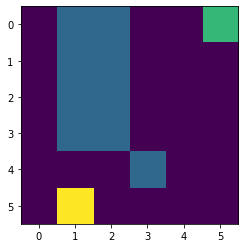

In [227]:
import matplotlib.pyplot as plt

plt.imshow(grid)
plt.show()

In [228]:
import cv2
cv2.transpose(grid)

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 3.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0.]])

In [288]:
test.run()

[((5, 0), 8.071067811865476), ((5, 2), 6.830951894845301), ((4, 1), 6.656854249492381)]


In [283]:
test.graph.neighbors['r'].neighbors['r'].neighbors['r'].g

3

In [279]:
ttt = test.T
a = list(filter(lambda x: x.f < 10, ttt))
print([n.pixel for n in a])
print()
print([n.pixel for n in ttt])

[(5, 1), (4, 1), (5, 2), (4, 2), (5, 3), (5, 0), (5, 4), (4, 4), (3, 4), (2, 4), (4, 0), (1, 4), (3, 0), (1, 5), (0, 4), (2, 5), (3, 5), (4, 5), (5, 5), (2, 0), (3, 3), (2, 3)]

[(5, 1), (4, 1), (5, 2), (4, 2), (5, 3), (5, 0), (5, 4), (4, 4), (3, 4), (2, 4), (4, 0), (1, 4), (3, 0), (1, 5), (0, 4), (2, 5), (3, 5), (4, 5), (5, 5), (2, 0), (3, 3), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (3, 1), (3, 2), (4, 3), (2, 1), (1, 1), (0, 1), (2, 2), (1, 2), (0, 2), (0, 5)]


In [237]:
a = set()

(5,2) in a

False

In [183]:
print(test.graph.pixel)
for key, item in test.graph.neighbors.items():
    print(key, item)

(5, 1)
u <__main__.Graph object at 0x7f0164224c70>
l <__main__.Graph object at 0x7f0163ee9330>
d None
r <__main__.Graph object at 0x7f0163eeb040>


In [184]:
print(test.graph.neighbors['l'].f)
print(test.graph.neighbors['r'].f)

8.071067811865476
6.830951894845301


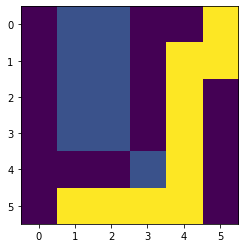

In [289]:
p = test.lastp
order = []
while p:
    order.append(p.pixel)
    grid[p.pixel] = 4
    p = p.parent
order[::-1]

plt.imshow(grid)
plt.show()

In [80]:
for i in range(1,6):
    print(f'5%{i} = ', 7%(i+1))

5%1 =  1
5%2 =  1
5%3 =  3
5%4 =  2
5%5 =  1


In [46]:
import os
import cv2

height, width = (16, 16) # in meters
scale = 28 # meters / pixel
def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

grid_path = os.path.join('catkin_ws/src/wavefront', 'worlds/grid1.npy')
grid = np.load(grid_path)
#grid = cv2.transpose(grid)

start = (-6, 2)
start_ = meters2pixels(start)
goal = (5, 2)
goal_ = meters2pixels(goal)
mapa = grid.copy()

mapa[goal_[1], goal_[0]] = 2
mapa[start_[1], start_[0]] = 3
grid


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint64)

In [33]:
grid = cv2.transpose(grid)
np.save('catkin_ws/src/Astar/worlds/grid1.npy', grid)
grid

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [29]:
grid = cv2.transpose(grid)

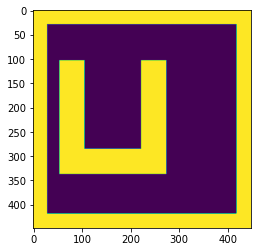

In [47]:
import matplotlib.pyplot as plt

plt.imshow(grid)
plt.show()

In [49]:
#test = A_star(grid, (start_[1],start_[0]), (goal_[1],goal_[0]))
test = A_star(grid, start_, goal_)
test.run()

[((55, 168), 310.0), ((56, 169), 309.00162337234525), ((56, 167), 309.00162337234525), ((57, 168), 308.0)]


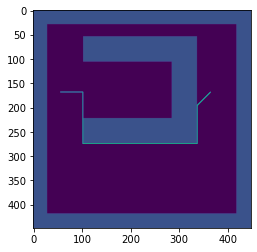

In [297]:
p = test.lastp
order = []
while p:
    order.append(p.pixel)
    mapa[p.pixel] = 4
    p = p.parent
#order[::-1]

plt.imshow(mapa)
plt.show()

In [52]:
import plotly.express as px
import plotly.graph_objects as go

a = np.array(list(map(list, zip(*test.path))))
fig = px.imshow(0**grid, binary_string=True)
fig.add_trace(go.Scatter(x=a[0,:].ravel(), y=a[1,:].ravel(), name='Caminho do Robô', showlegend=True))
fig.show()

In [43]:
import pandas as pd
df = pd.read_csv('/home/fbartelt/Documents/UFMG/Planejamento/logs/astar_path.csv', index_col=0)
df

,0,1
0,168,56
1,168,57
2,168,58
3,168,59
4,168,60
...,...,...
516,170,362
517,170,363
518,169,363
519,169,364


In [45]:
fig = px.imshow(0**grid, binary_string=True)
fig.add_trace(go.Scatter(x=df['1'], y=df['0'], name='Caminho do Robô', showlegend=True))
fig.show()

In [55]:
def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

pixels2meters((168, 56))

(-2.0, 6.0)

In [62]:
import time

a = time.time()
time.sleep(1.234)
b = time.time()
tt = b - a
m, s = divmod(tt, 60)
ss = '{:.2}min {:.2}s'.format(m, s)
print(ss)

0.0min 1.2s


In [63]:
mapa[None]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]], dtype=uint64)

# Trapezoidal

In [11]:
height, width = (16, 16) # in meters
scale = 28 # meters / pixel

def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

In [28]:
import plotly.express as px
import cv2
img = cv2.imread('trapz.png', cv2.IMREAD_GRAYSCALE)
img = img / 255
fig = px.imshow(img)
fig.show()

In [29]:
corners = [
           [4, 121], [31, 110], [39, 4], [48, 56], [58, 248], [81, 28], 
           [100, 183], [143, 101], [147, 215], [174, 104], [184, 250],
           [198, 7], [218, 97], [252, 80]
           ]
corners = [tuple(x) for x in corners]
for corner in corners:
    img[corner[1], corner[0]] = 2

fig = px.imshow(img)
fig.show()

In [24]:
img[1, 1]

1.0

# GVD

In [8]:
import numpy as np
import plotly.express as px
import pandas as pd

width, height = (64, 40.5) # in meters
scale = 13 # meters / pixel

class GVD:
    def __init__(self):
        self.edges = set()
        self.meet_points = set()
    
    def add_edge(self, coord):
        if coord in self.edges:
            self.edges.remove(coord)
            self.meet_points.add(coord)
        else:
            self.edges.add(coord)

def meters2pixels(coord):
    """Converts coordinate in meters to pixel coordinate.
    """
    xm, ym = coord
    xp = int(np.round(scale * (xm + width // 2)))
    yp = int(np.round(scale * (-ym + height // 2)))
    coord_pixels = (xp, yp)
    
    return coord_pixels

def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters

step = (2*np.pi)/1440
step

0.004363323129985824

In [49]:
df = pd.read_csv('/home/fbartelt/Documents/UFMG/Planejamento/logs/GVD.csv', index_col=0)
fig = px.scatter(df, x='0', y='1')
fig.show()

In [11]:
import pickle 

with open('/home/fbartelt/Documents/UFMG/Planejamento/logs/GVD.pickle', 'rb') as handle:
    gvd = pickle.load(handle)

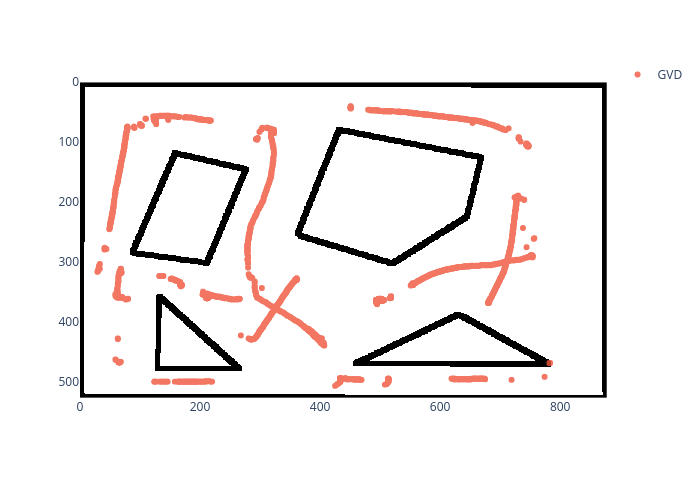

In [14]:
import cv2
#x, y = list(zip(*[meters2pixels((z, w)) for z, w in gvd.meet_points]))
xx, yy = list(zip(*[meters2pixels((z, w)) for z, w in gvd.edges if z != np.inf and w!=np.inf]))
meet_points = [meters2pixels(x) for x in gvd.meet_points.keys()]
#xm, ym = list(zip(*meet_points))

img = cv2.imread('catkin_ws/src/GVD/worlds/gvd.png')
fig = px.imshow(img)
fig.add_scatter(x=xx, y=yy, mode='markers', opacity=0.8, name='GVD', showlegend=True)
fig.update_xaxes(range=[0, 878])
fig.update_yaxes(range=[526, 0])
#fig.add_scatter(x=xm, y=ym, mode='markers', marker_symbol='star', marker_size=10, name='meet points')
fig.show(renderer='png')

In [6]:
import numpy as np
choices = np.arange(len([1, 2, 3]))
np.random.default_rng().shuffle(choices)
choices

array([2, 1, 0])

In [104]:
import cv2
import pickle 

with open('/home/fbartelt/Documents/UFMG/Planejamento/logs/GVD.pickle', 'rb') as handle:
    gvd = pickle.load(handle)
#x, y = list(zip(*[meters2pixels((z, w)) for z, w in gvd.meet_points]))
xx, yy = list(zip(*[meters2pixels((z, w)) for z, w in gvd.edges if z != np.inf and w!=np.inf]))
meet_points = [meters2pixels(x) for x in gvd.meet_points.keys()]
#xm, ym = list(zip(*meet_points))

img = cv2.imread('catkin_ws/src/GVD/worlds/gvd.png')
fig = px.imshow(img)
fig.add_scatter(x=xx, y=yy, mode='markers', opacity=0.8, name='GVD')
#fig.add_scatter(x=xm, y=ym, mode='markers', marker_symbol='star', marker_size=10, name='meet points')
fig.show()

In [68]:
from collections import deque
from functools import reduce
test = deque([np.array([1,1]), np.array([2, 2])], maxlen=2)
print(test)
test.appendleft(np.array([3,3]))
print(test)
print(reduce(lambda x,y: x-y, test))

deque([array([1, 1]), array([2, 2])], maxlen=2)
deque([array([3, 3]), array([1, 1])], maxlen=2)
[2 2]


In [102]:
from functools import reduce
vec = [np.array([ 4.29864299e+00, -1.48503929e-04]), np.array([ 4.21688736e+00, -1.71845302e-04])]
#vec = np.array([[4.29864299e+00, -1.48503929e-04], [4.21688736e+00, -1.71845302e-04]])
#vec = np.array([ 4.29864299e+00, 4.21688736e+00])
#vec = np.array([-1.48503929e-04, -1.71845302e-04])
grad = reduce(lambda x, y: x-y, vec)
print(vec)
print(grad)
aux = np.r_[(grad[::-1]).reshape(1, -1), grad.reshape(1, -1)]
print(aux)
print(-8.1755630e-2 + 2.3341373e-5)
np.gradient(aux)

[array([ 4.29864299e+00, -1.48503929e-04]), array([ 4.21688736e+00, -1.71845302e-04])]
[8.1755630e-02 2.3341373e-05]
[[2.3341373e-05 8.1755630e-02]
 [8.1755630e-02 2.3341373e-05]]
-0.081732288627


[array([[ 0.08173229, -0.08173229],
        [ 0.08173229, -0.08173229]]),
 array([[ 0.08173229,  0.08173229],
        [-0.08173229, -0.08173229]])]

In [36]:
test = np.array([4.987645  , 5.51441651 ,3.75239449])
idx = np.nonzero(np.triu(np.isclose(test[:, None], test, 1e-2), 1))
list(zip(*idx))

[]

In [37]:
(1,2) != False

True

In [22]:
import numpy as np

a = np.array([2.183, 1.2, 3.4, 2.18])
b = a[:, None] - a
print(b)
c = np.triu(b, 1)
print(c)
b[np.triu_indices(b.shape[0], k=1)]

array([[ 0.   ,  0.983, -1.217,  0.003],
       [-0.983,  0.   , -2.2  , -0.98 ],
       [ 1.217,  2.2  ,  0.   ,  1.22 ],
       [-0.003,  0.98 , -1.22 ,  0.   ]])

In [148]:
a = [np.array([1, 2]), np.array([3, 4]), np.array([5, 6]), np.array([-1, -2])]
a

[array([1, 2]), array([3, 4]), array([5, 6]), array([-1, -2])]

In [150]:
b = np.array(a, dtype=np.float32)
c = b + b[:, None]
c

array([[[ 2.,  4.],
        [ 4.,  6.],
        [ 6.,  8.],
        [ 0.,  0.]],

       [[ 4.,  6.],
        [ 6.,  8.],
        [ 8., 10.],
        [ 2.,  2.]],

       [[ 6.,  8.],
        [ 8., 10.],
        [10., 12.],
        [ 4.,  4.]],

       [[ 0.,  0.],
        [ 2.,  2.],
        [ 4.,  4.],
        [-2., -4.]]], dtype=float32)

In [132]:
c[np.diag_indices(4)] = np.inf
c

array([[[inf, inf],
        [ 2.,  2.],
        [ 4.,  4.],
        [ 6.,  6.]],

       [[-2., -2.],
        [inf, inf],
        [ 2.,  2.],
        [ 4.,  4.]],

       [[-4., -4.],
        [-2., -2.],
        [inf, inf],
        [ 2.,  2.]],

       [[-6., -6.],
        [-4., -4.],
        [-2., -2.],
        [inf, inf]]], dtype=float32)

In [151]:
tt = np.linalg.norm(c, axis=2)
tt

array([[ 4.472136 ,  7.2111025, 10.       ,  0.       ],
       [ 7.2111025, 10.       , 12.806249 ,  2.828427 ],
       [10.       , 12.806249 , 15.6205   ,  5.656854 ],
       [ 0.       ,  2.828427 ,  5.656854 ,  4.472136 ]], dtype=float32)

In [156]:
norms = tt[np.triu_indices(tt.shape[0], 1)]
norms

array([ 7.2111025, 10.       ,  0.       , 12.806249 ,  2.828427 ,
        5.656854 ], dtype=float32)

In [158]:
np.sum(norms <= 0.6)

1

In [162]:
debu = np.array([[ 1.30017821e-02,  6.92155497e-02],
 [-1.39138234e-01,  1.67307712e-04],
 [ 2.28562103e-01,  3.21834515e-03],
 [ 2.09861425e-02,  1.76619570e-02]])
dd = debu + debu[:, None]
dd.shape

(4, 4, 2)

In [169]:
aaaa = np.linalg.norm(dd, axis=2)
aaaa

array([[0.14085224, 0.14395967, 0.25218997, 0.09328923],
       [0.14395967, 0.27827667, 0.08948794, 0.11948975],
       [0.25218997, 0.08948794, 0.45716952, 0.25042027],
       [0.09328923, 0.11948975, 0.25042027, 0.05485847]])

In [166]:
aaaa[np.triu_indices(aaaa.shape[0], 1)]

array([0.14395967, 0.25218997, 0.09328923, 0.08948794, 0.11948975,
       0.25042027])

In [174]:
np.triu_indices(4)

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([0, 1, 2, 3, 1, 2, 3, 2, 3, 3]))

In [129]:
#lims = [(345, 400), (402, 506), (707, 890), (891, 1300), (1303, 2500)]
#lims = [(0, 642), (785, 786), (797, 798), (1172, 1439)]
lims = [(0, 571), (671, 672), (674, 675), (678, 750), (753, 754), (1106, 1439)]
print(lims)
lims_ = list(map(np.array, zip(*lims)))
lims_

[(0, 571), (671, 672), (674, 675), (678, 750), (753, 754), (1106, 1439)]


[array([   0,  671,  674,  678,  753, 1106]),
 array([ 571,  672,  675,  750,  754, 1439])]

In [153]:
idx = np.indices(lims_[0].shape).ravel()
idx2 = np.indices(lims_[1].shape).ravel()
rep = [x for i, x in enumerate(lims_[0]) if any((x - 10 <= lims_[1][idx[i+1::]]) & (lims_[1][idx[i+1::]] <= x + 10))]
rep2 = [x for i, x in enumerate(lims_[1]) if any((x - 10 <= lims_[0][idx2[i+1::]]) & (lims_[0][idx2[i+1::]] <= x + 10))]
#rep2 = [x for i, x in enumerate(lims_[1]) if any((x - 10 <= np.array(rep)) & (np.array(rep) <= x + 10))]
rep, rep2

([671], [672, 675, 750])

In [170]:
rep = [(i, np.where(((x - 10 <= lims_[1][idx]) & (lims_[1][idx] <= x + 10))  & (idx > i))) for i, x in enumerate(lims_[0])]
rep2 = [(i, np.where(((x - 10 <= lims_[0][idx2]) & (lims_[0][idx2] <= x + 10))& (idx > i))) for i, x in enumerate(lims_[1])]
rep, rep2

([(0, (array([], dtype=int64),)),
  (1, (array([2]),)),
  (2, (array([], dtype=int64),)),
  (3, (array([], dtype=int64),)),
  (4, (array([], dtype=int64),)),
  (5, (array([], dtype=int64),))],
 [(0, (array([], dtype=int64),)),
  (1, (array([2, 3]),)),
  (2, (array([3]),)),
  (3, (array([4]),)),
  (4, (array([], dtype=int64),)),
  (5, (array([], dtype=int64),))])

In [9]:
import numpy as np

dic = {}
point = (1, 2)
eigenv = np.linalg.eig(np.array([[1,2 ],[3,4]]))[1]
if point in dic.keys():
    aux = []
    for dirs in dic[point]:
        if dirs[0] == eigenv:
            pass
else:
    dic[point] = [(x, 0) for x in eigenv.T]

In [5]:
np.linalg.eig(np.array([[1,2 ],[3,4]]))[1]

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

In [10]:
dic[point]

[(array([-0.82456484,  0.56576746]), 0),
 (array([-0.41597356, -0.90937671]), 0)]

In [13]:
def _check_unitable(interval):
    lims_ = list(map(np.array, zip(*interval)))
    idx = np.indices(lims_[0].shape).ravel()
    idx2 = np.indices(lims_[1].shape).ravel()
    rep = [(i, np.where(((x - 10 <= lims_[1][idx]) & (lims_[1][idx] <= x + 10))  & (idx > i))) 
            for i, x in enumerate(lims_[0])]
    rep2 = [(i, np.where(((x - 10 <= lims_[0][idx2]) & (lims_[0][idx2] <= x + 10))& (idx > i))) 
            for i, x in enumerate(lims_[1])]
    rep = [(k, l[0].ravel()) for k, l in rep if l[0].size != 0]
    rep2 = [(k, l[0].ravel()) for k, l in rep2 if l[0].size != 0]
    return rep, rep2

def interval_union(intervals, verbose=False):
    aa = intervals.copy()
    aa_ = np.array(aa)
    idxs = np.array(range(aa_.size)).reshape(aa_.shape)
    lll = [np.where(((inf <= aa_) & (aa_ <= sup)) & (idxs//2 != i)) for i, (inf, sup) in enumerate(aa_)]
    ttt = [(i, x[0]) for i, x in enumerate(lll) if x[0].size!=0 and x[1].size!=0]
    new_lims = set(aa)
    new_idx = {}

    for k in ttt:
        i, (idx, *_) = k
        temp1, temp2 = aa_[i], aa_[idx]
        
        if tuple(temp1) in new_idx.keys():
            temp1 = new_idx[tuple(temp1)]
        if tuple(temp2) in new_idx.keys():
            temp2 = new_idx[tuple(temp2)]

        inf, sup = temp1
        inf2, sup2 = temp2

        if inf2 < inf:
            inf = inf2
        if sup2 > sup:
            sup = sup2
        
        new_idx[tuple(temp1)] = (inf, sup)
        new_idx[tuple(temp2)] = (inf, sup)
        new_lims.discard(tuple(temp1))
        new_lims.discard(tuple(temp2))
        new_lims.add((inf, sup))
        
        if verbose:
            print(i, idx)
            print(aa_[i], aa_[idx])
            print(inf, sup)
            print(new_idx)
    new_lims = list(new_lims)
    new_lims.sort(key=lambda x: x[0])
    if verbose:
        print(new_lims)
    
    return new_lims

def aprox_interval_union(interval, verbose=False, counter=0):
    lims_ = list(map(np.array, zip(*interval)))
    idx = np.indices(lims_[0].shape).ravel()
    idx2 = np.indices(lims_[1].shape).ravel()
    rep = [(i, np.where(((x - 10 <= lims_[1][idx]) & (lims_[1][idx] <= x + 10))  & (idx > i))) 
            for i, x in enumerate(lims_[0])]
    rep2 = [(i, np.where(((x - 10 <= lims_[0][idx2]) & (lims_[0][idx2] <= x + 10))& (idx > i))) 
            for i, x in enumerate(lims_[1])]
    rep = [(k, l[0].ravel()) for k, l in rep if l[0].size != 0]
    rep2 = [(k, l[0].ravel()) for k, l in rep2 if l[0].size != 0]
    new_lims = set(interval)
    new_idx1 = {}
    new_idx2 = {}
    print('debug0', interval)
    for i, p in enumerate([rep, rep2]):
        if verbose:
            print('EM', i)
        for r in p:
            k, l = r
            curr = interval[k]
            if verbose:
                print('curr: ', curr)
            for idx in l:
                remove = interval[idx]
                if verbose:
                    print('remove: ', remove)
                if i ==0:
                    if interval[idx] in new_idx2.keys():
                        remove = new_idx2[interval[idx]]
                    new_lims.discard(remove)
                    new_lims.discard(curr)
                    newl = (curr[0], remove[1])
                    new_lims.add(newl)
                    new_idx1[curr] = newl
                    new_idx2[remove] = newl
                else:
                    if interval[idx] in new_idx1.keys():
                        remove = new_idx1[interval[idx]]
                    newl = (curr[0], remove[1])
                    new_lims.discard(remove)
                    new_lims.discard(curr)
                    new_lims.add(newl)
                    new_idx2[curr] = newl
                    new_idx1[remove] = newl
                if verbose:
                    print(newl)
                    print(new_idx1, new_idx2)
    
    new_lims = list(new_lims)
    new_lims.sort(key=lambda x: x[0])
    t1, t2 = _check_unitable(new_lims)
    
    if len(t1) > 0 or len(t2) > 0:
        print('debug1', new_lims)
        if verbose:
            print(new_lims)
        new_lims = aprox_interval_union(new_lims, verbose, counter=counter+1)
    print('debug2', new_lims)
    new_lims = interval_union(new_lims)
    print('debug3', new_lims)
    print(counter)

    return  new_lims

In [14]:
#alims = [(0, 571), (671, 672), (674, 675), (678, 750), (700, 754), (753, 1439), (1440, 1500)]
alims = [(0, 571), (671, 672), (674, 675), (678, 750), (753, 754), (1106, 1439)]
aux = aprox_interval_union(alims);
aux

debug0 [(0, 571), (671, 672), (674, 675), (678, 750), (753, 754), (1106, 1439)]
debug1 [(0, 571), (671, 675), (674, 750), (678, 754), (1106, 1439)]
debug0 [(0, 571), (671, 675), (674, 750), (678, 754), (1106, 1439)]
debug2 [(0, 571), (671, 750), (671, 754), (1106, 1439)]
debug3 [(0, 571), (671, 754), (1106, 1439)]
1
debug2 [(0, 571), (671, 754), (1106, 1439)]
debug3 [(0, 571), (671, 754), (1106, 1439)]
0


[(0, 571), (671, 754), (1106, 1439)]

In [420]:
aa = [(0, 571), (671, 672), (674, 675), (678, 750), (700, 754), (753, 1439)]
aa_ = np.array(aa)
#aa_ = np.array([(0, 571), (671, 672), (674, 675), (678, 750), (753, 754), (1106, 1439)])
idxs = np.array(range(aa_.size)).reshape(aa_.shape)
lll = [np.where(((inf <= aa_) & (aa_ <= sup)) & (idxs//2 != i)) for i, (inf, sup) in enumerate(aa_)]
lll

[(array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([4]), array([0])),
 (array([3, 5]), array([1, 0])),
 (array([4]), array([1]))]

In [423]:
def interval_union(intervals):
    aa = intervals.copy()
    aa_ = np.array(aa)
    idxs = np.array(range(aa_.size)).reshape(aa_.shape)
    lll = [np.where(((inf <= aa_) & (aa_ <= sup)) & (idxs//2 != i)) for i, (inf, sup) in enumerate(aa_)]
    ttt = [(i, x[0]) for i, x in enumerate(lll) if x[0].size!=0 and x[1].size!=0]
    new_lims = set(aa)
    new_idx = {}

    for k in ttt:
        i, (idx, *_) = k
        temp1, temp2 = aa_[i], aa_[idx]
        
        if tuple(temp1) in new_idx.keys():
            temp1 = new_idx[tuple(temp1)]
        if tuple(temp2) in new_idx.keys():
            temp2 = new_idx[tuple(temp2)]

        inf, sup = temp1
        inf2, sup2 = temp2

        if inf2 < inf:
            inf = inf2
        if sup2 > sup:
            sup = sup2
        
        new_idx[tuple(temp1)] = (inf, sup)
        new_idx[tuple(temp2)] = (inf, sup)
        new_lims.discard(tuple(temp1))
        new_lims.discard(tuple(temp2))
        new_lims.add((inf, sup))
        
        #print(i, idx)
        #print(aa_[i], aa_[idx])
        #print(inf, sup)
        #print(new_idx)
    new_lims = list(new_lims)
    new_lims.sort(key=lambda x: x[0])
    #print(new_lims)
    
    return new_lims

In [288]:
lims_ = list(map(np.array, zip(*a)))
idx = np.indices(lims_[0].shape).ravel()
idx2 = np.indices(lims_[1].shape).ravel()
rep = [(i, np.where(((x - 10 <= lims_[1][idx]) & (lims_[1][idx] <= x + 10))  & (idx > i))) 
        for i, x in enumerate(lims_[0])]
rep2 = [(i, np.where(((x - 10 <= lims_[0][idx2]) & (lims_[0][idx2] <= x + 10))& (idx > i))) 
        for i, x in enumerate(lims_[1])]
rep3 = [(k, l[0].ravel()) for k, l in rep if l[0].size != 0]
rep4 = [(k, l[0].ravel()) for k, l in rep2 if l[0].size != 0]

In [235]:
rep = [(k, l[0].ravel()) for k, l in rep if l[0].size != 0]
rep2 = [(k, l[0].ravel()) for k, l in rep2 if l[0].size != 0]
new_lims = set(lims)
new_idx1 = {}
new_idx2 = {}
dicts = [new_idx1, new_idx2]

for i, p in enumerate([rep, rep2]):
    print('EM', i)
    for r in p:
        k, l = r
        curr = lims[k]
        print('curr: ', curr)
        for idx in l:
            remove = lims[idx]
            print('remove:', remove)
            if i ==0:
                if lims[idx] in new_idx2.keys():
                    remove = new_idx2[lims[idx]]
                new_lims.discard(remove)
                new_lims.discard(curr)
                newl = (curr[0], remove[1])
                new_lims.add(newl)
                new_idx1[curr] = newl
                new_idx2[remove] = newl
            else:
                if lims[idx] in new_idx1.keys():
                    remove = new_idx1[lims[idx]]
                newl = (curr[0], remove[1])
                new_lims.discard(remove)
                new_lims.discard(curr)
                new_lims.add(newl)
                new_idx2[curr] = newl
                new_idx1[remove] = newl
            print(newl)
            print(new_idx1, new_idx2)
new_lims

EM 0
curr:  (671, 672)
remove: (674, 675)
(671, 675)
{(671, 672): (671, 675)} {(674, 675): (671, 675)}
EM 1
curr:  (671, 672)
remove: (674, 675)
(671, 675)
{(671, 672): (671, 675), (674, 675): (671, 675)} {(674, 675): (671, 675), (671, 672): (671, 675)}
curr:  (674, 675)
remove: (678, 750)
(674, 750)
{(671, 672): (671, 675), (674, 675): (671, 675), (678, 750): (674, 750)} {(674, 675): (674, 750), (671, 672): (671, 675)}
curr:  (678, 750)
remove: (753, 754)
(678, 754)
{(671, 672): (671, 675), (674, 675): (671, 675), (678, 750): (674, 750), (753, 754): (678, 754)} {(674, 675): (674, 750), (671, 672): (671, 675), (678, 750): (678, 754)}


{(0, 571), (671, 675), (674, 750), (678, 754), (1106, 1439)}

In [243]:
print(new_idx1)

print(new_idx2)
[i for i, x in new_idx1.items() if x == (671, 675)]

{(671, 672): (671, 675), (674, 675): (671, 675), (678, 750): (674, 750), (753, 754): (678, 754)}
{(674, 675): (674, 750), (671, 672): (671, 675), (678, 750): (678, 754)}


[(671, 672), (674, 675)]

In [159]:
(671 - 10 <= lims_[1][idx]) & (lims_[1][idx] <= 671 + 10)

array([False,  True,  True, False, False, False])

In [131]:
lim_inf, lim_sup = np.array(lims_[0]), np.array(lims_[1])
new_inf = [x for x in lim_inf if x not in rep]
new_sup = [x for x in lim_sup if x not in rep2]
new_lims = list(zip(new_inf, new_sup))
new_lims

[(0, 571), (1106, 1439)]

In [99]:
ranges_ = [1, 2, 3, 4, 5, 8, 8, 8, 8, 2, 2, 2,2, 8, 8, 9]
cont_indx = np.nonzero(np.array(ranges_) < 8)[0]
# Get superior and inferior limits of continuities
lim_sup = np.array([x for i, x in enumerate(cont_indx) 
                    if (x + 1 != cont_indx[(i + 1) % len(cont_indx)])])
lim_inf = np.array([x for i, x in enumerate(cont_indx) 
                    if (x - 1 != cont_indx[(i - 1) % len(cont_indx)])])
cont_lims = [x for x in zip(lim_inf, lim_sup) if x[0] != x[1]]

In [101]:
cont_lims, lim_inf, lim_sup

([(0, 4), (9, 12)], array([0, 9]), array([ 4, 12]))